In [ ]:
import pickle
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/dl.csv")
texts=df["message"]
texts

,message
0,Remember to submit your report by 5 PM today.
1,The meeting has been rescheduled to tomorrow.
2,Don't forget to buy milk on your way home.
3,The deadline for the project is next week.
4,Reminder: Your dentist appointment is at 10 AM...
...,...
395,Your order has been shipped.
396,Happy Independence Day!
397,Don't miss the early bird registration deadline.
398,Enjoy your vacation!


In [ ]:
labels = df["label"]
labels

,label
0,1
1,1
2,0
3,1
4,1
...,...
395,0
396,0
397,1
398,0


In [ ]:
max_words = 1000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
print(sequences)
X = pad_sequences(sequences, maxlen=max_len)
print(X)
y = np.array(labels)
print(y)

[[179, 7, 66, 2, 67, 15, 180, 74, 159], [1, 37, 18, 29, 93, 7, 13], [6, 9, 7, 75, 181, 61, 2, 182, 183], [1, 8, 3, 1, 68, 4, 10, 21], [26, 2, 76, 47, 4, 22, 160, 40, 13], [11, 2, 62], [5, 48, 7, 161, 94, 162, 163, 162, 184], [164, 95, 7, 69, 2, 38], [1, 77, 20, 36, 56, 41], [185, 186, 63, 3, 187, 188, 161, 21], [6, 19, 147, 61, 156, 165, 95, 189], [2, 190, 18, 29, 191], [192, 17, 1, 193, 194, 166, 1, 37], [1, 31, 20, 22, 195, 74, 42], [14, 96, 196, 167, 197, 78, 198, 12], [5, 79, 1, 70, 15, 1, 23, 24, 1, 12], [26, 13, 4, 1, 8, 3, 39], [6, 9, 7, 64, 3, 1, 199], [1, 16, 97, 36, 200, 41], [201, 167, 78, 202, 203], [168, 204, 80, 61, 205, 206], [1, 28, 49, 61, 43], [11, 2, 50], [2, 207, 4, 208], [209, 210, 2, 169, 61, 1, 65, 211, 212], [6, 9, 7, 213, 2, 214, 215, 42], [1, 67, 4, 51, 10, 32], [14, 170], [2, 38, 157, 10, 21], [164, 95, 7, 69, 2, 216, 217], [26, 2, 171, 4, 13, 22, 52, 40], [1, 53, 20, 36, 172, 173], [6, 19, 1, 44, 71, 81], [5, 17, 33, 82, 1, 218, 72], [1, 8, 3, 1, 34, 25, 4, 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))  # Increased embedding dimension
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))  # Increased LSTM units and dropout, added return_sequences
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))  # Another LSTM layer
model.add(Dense(64, activation='relu'))  # Added a fully connected layer
model.add(Dropout(0.5))  # Added dropout after Dense layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import matplotlib.pyplot as plt
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Accessing the accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


NameError: name 'model' is not defined

In [ ]:
# Save model and tokenizer
print("Saving model and tokenizer...")

# Save the Keras model
model.save("time_sensitive_model.h5")
print(f"✅ Model saved as 'time_sensitive_model.h5'")

# Save the tokenizer using pickle
with open("tokenizer.pkl", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f"✅ Tokenizer saved as 'tokenizer.pkl'")

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8953 - loss: 0.2444
Test Accuracy: 0.8999999761581421


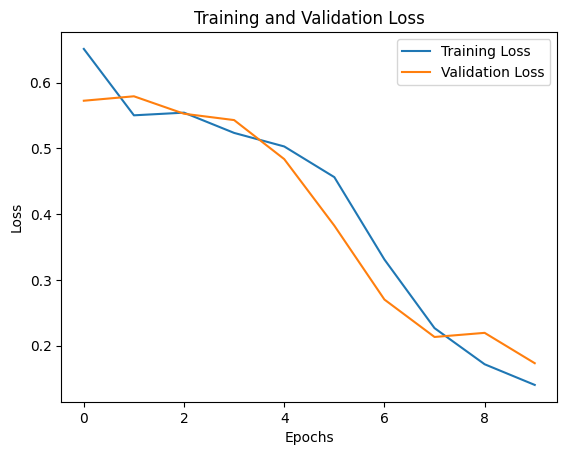

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
new_texts = ["Don't forget the deadline for the project is Friday.",
             "Let's meet at 2 PM to discuss the budget.",
             "The weather forecast for tomorrow is sunny."
             ,"hi"]

In [ ]:
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_sequences, maxlen=max_len)

In [ ]:
predictions = model.predict(new_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


In [ ]:
threshold = 0.75  # Adjust as needed based on your model's performance
for i, text in enumerate(new_texts):
    if predictions[i] > threshold:
        print(f"Text: '{text}' is identified as time-sensitive.")
    else:
        print(f"Text: '{text}' is not identified as time-sensitive.")

Text: 'Don't forget the deadline for the project is Friday.' is identified as time-sensitive.
Text: 'Let's meet at 2 PM to discuss the budget.' is identified as time-sensitive.
Text: 'The weather forecast for tomorrow is sunny.' is identified as time-sensitive.
Text: 'hi' is not identified as time-sensitive.


In [ ]:
%notebook -e combined_cells.py